### Question 6 Solution 

#### Importing all libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import sqrt
from math import pi
from math import exp
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Preprocessing/EDA

In [2]:
#reading the data into dataframe
data = pd.read_csv("adult_csv.csv")

In [3]:
#looking at first 5 rows of dataset
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [4]:
#information of all attributes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capitalgain       48842 non-null int64
capitalloss       48842 non-null int64
hoursperweek      48842 non-null int64
native-country    47985 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#data type of all attributes
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [6]:
# number of rows and columns
data.shape

(48842, 15)

In [7]:
#changing the data type of the class column ( predictor) so that it gets easy to compare accuracy.
data['class'] = data['class'].astype('str')

In [8]:
#describing data to check the distribution
data.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.771078,1.896641e+05,10.078089,0.200319,0.114942,1.950698
std,1.295378,1.056040e+05,2.570973,0.746182,0.556924,0.897038
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.175505e+05,9.000000,0.000000,0.000000,2.000000
50%,2.000000,1.781445e+05,10.000000,0.000000,0.000000,2.000000
75%,3.000000,2.376420e+05,12.000000,0.000000,0.000000,2.000000
max,4.000000,1.490400e+06,16.000000,4.000000,4.000000,4.000000


In [9]:
#the columns in the data set
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'class'],
      dtype='object')

### 6.1

In [10]:
# dropping columns as mentioned
data.drop(['capitalgain','capitalloss','native-country'],axis=1,inplace=True)

In [11]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hoursperweek', 'class'],
      dtype='object')

In [12]:
### percentage of null values
round((data.isnull().sum()*100)/(len(data.index)),2)

age               0.00
workclass         5.73
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.75
relationship      0.00
race              0.00
sex               0.00
hoursperweek      0.00
class             0.00
dtype: float64

In [13]:
### count of null values in the columns
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
hoursperweek         0
class                0
dtype: int64

### 6.2

In [14]:
#dropping the columns with highest null values
data.drop(['workclass','occupation'],axis=1,inplace=True)

In [15]:
# checking the class labels present in the data
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

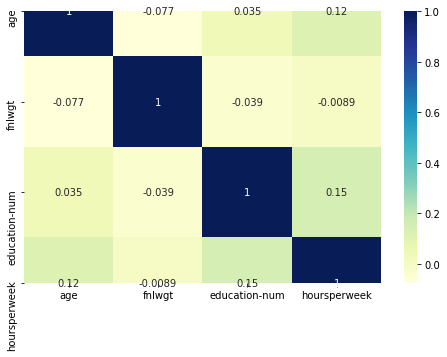

In [16]:
# finding coorelation between all features (numerical) Sometimes from this plot you can find features which are not correlated or constant and drop them.
plt.figure(figsize = (8, 5))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

In [17]:
counts = data['class'].value_counts()
counts

<=50K    37155
>50K     11687
Name: class, dtype: int64

### 6.3

In [18]:
# split data into train 90% and test 10%
data_train, data_test = train_test_split(data, test_size=0.1, random_state=25)

In [19]:
#shape of train data
data_train.shape

(43957, 10)

In [20]:
#shape of test data
data_test.shape

(4885, 10)

In [21]:
data_train.head(5)

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,hoursperweek,class
19439,0,116800,Assoc-acdm,12,Never-married,Own-child,White,Male,3,<=50K
8036,3,608184,Bachelors,13,Married-civ-spouse,Husband,Black,Male,2,>50K
557,1,323069,HS-grad,9,Separated,Unmarried,White,Female,0,<=50K
18232,4,37092,7th-8th,4,Married-civ-spouse,Husband,White,Male,0,<=50K
18814,2,193494,Prof-school,15,Married-civ-spouse,Husband,White,Male,3,>50K


### Building the Classifier

In [22]:
###  probability calculation for class label
num_l = len(data_train.loc[data_train['class'] == '<=50K'])
den = len(data['class'])
num_h = len(data_train.loc[data_train['class'] == '>50K'])
class_less = num_l / den
class_high = num_h / den
# print(num_l,den)

#### Normal distribution needs mean, standard of deviation

In [23]:
# Calculate the mean of a list of numbers in the column
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [24]:
# mean(data_train.loc[data_train['class'] == '<=50K']['age'])

In [25]:
# Calculate the standard deviation of a list of numbers in the column
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

In [26]:
### defining the normal distribution function  w.r.t to class label and for specific columns
#### it returns mnean and std values to norm_prob funciton
def normal_distribution(data_normal,classlabel,colname):
    data_class = data_normal.loc[data_normal['class'] == classlabel][colname]
    m = mean(data_class)
    s = stdev(data_class)
    return(m,s)
    
    
    

In [27]:
# print(normal_distribution(data_train,'<=50K','age'))

In [28]:
### finding the remaining columns for laplace
columns_need = ['age', 'fnlwgt','education-num','hoursperweek']
set(data.columns) - set(columns_need)

{'class', 'education', 'marital-status', 'race', 'relationship', 'sex'}

In [29]:
### function calculates probabilities of all attributes and returns the product
def norm_prob(data_train,class_label,x):
    # for class <=50K
    columns_need = ['age', 'fnlwgt','education-num','hoursperweek']
    total_prob = []
    for each in columns_need:
        math_all = normal_distribution(data_train,class_label,each)
        mean = math_all[0]
        stdev = math_all[1]
        exponent = exp(-((x[each]-mean)**2 / (2 * stdev**2 )))
        prob_norm = (1 / (sqrt(2 * pi) * stdev)) * exponent
        total_prob.append(prob_norm)
#     print("col prob",total_prob)
    mul_prob = np.prod(np.array(total_prob)) 
    return mul_prob

In [38]:
# laplace smoothing is usually used when the probability is zero.
# here we can check if the probability is zero then apply laplace or just do the original probability calculation.
#nc/n = number of instances 

def laplace(data_train,class_label,x):
    columns_need = ['education', 'marital-status', 'race', 'relationship', 'sex']
    total_prob = []
    for each in columns_need:
        data_class = data_train.loc[(data_train['class'] == class_label) & (data_train[each] == x[each])]
        prob_categ = len(data_class)/num_l
        if prob_categ == 0:
            v = len(data_train[each].unique())
            prob_categ = len(data_class) + 1/num_l + v
        total_prob.append(prob_categ)
    mul_prob = np.prod(np.array(total_prob)) 
    return mul_prob        

In [57]:
### gives the best probability among the two labels
def model_both(data,row):
    class_labels = ['<=50K','>50K']
    for each in class_labels:
        # norm_prob
        total_norm = norm_prob(data,each,row)
#         print("norm",total_norm)
#         laplace
        total_lap = laplace(data,each,row)
        if each == '<=50K':
            total_both_less = total_norm * class_less * total_lap
            
        else:
            total_both_high=total_norm * class_high * total_lap
#         print(total_both)
        
    if total_both_less > total_both_high:
#         print("class is less")
        return '<=50K'
    else:
        return '>50K'
        
    
    
    

In [63]:
# main function to pass train or test data or data of your choice.
#It adds "predicted" column name and updates with predicted value.
def main(data_train,data_dup):
#     i = 0
    for j,each in data_dup.iterrows():
#         if i <= 10:
        both_prob = model_both(data_train,each)
        data_dup.loc[j,'predicted'] = both_prob
#         i = i+1

In [60]:
# comment which ever you dont want to run for
# training 
data_dup = data_train.copy()
main(data_train,data_train)
# testing 
data_dup = data_test.copy()
main(data_train,data_test)

In [65]:
# last run on test data displaying the first 10 test data values
data_dup.head(10)

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,hoursperweek,class,predicted
38440,4,290922,HS-grad,9,Divorced,Not-in-family,White,Female,1,<=50K,<=50K
17565,2,128736,10th,6,Divorced,Not-in-family,White,Female,2,<=50K,<=50K
32266,3,324791,Masters,14,Married-civ-spouse,Husband,White,Male,3,>50K,<=50K
28434,3,116635,Bachelors,13,Separated,Unmarried,Black,Female,2,<=50K,<=50K
14233,2,77975,Some-college,10,Married-civ-spouse,Husband,White,Male,2,<=50K,<=50K
40344,2,143437,Bachelors,13,Divorced,Not-in-family,Other,Female,2,<=50K,<=50K
41368,0,292816,Assoc-voc,11,Never-married,Own-child,White,Female,2,<=50K,<=50K
25342,2,90021,HS-grad,9,Married-civ-spouse,Husband,White,Male,2,<=50K,<=50K
45029,1,203171,Assoc-voc,11,Never-married,Own-child,White,Male,3,<=50K,<=50K
45621,1,207685,Bachelors,13,Separated,Unmarried,Black,Female,2,<=50K,<=50K


In [66]:
# encoding the class label because of the string type.
# easy to compute accuracy
def enumerate_yes_no(x):
    if x == '<=50K':
        return (1)
    else:
        return (0)

In [67]:
#applying the above encoder function
data_dup['class'] = data_dup['class'].apply(enumerate_yes_no)
data_dup['predicted'] = data_dup['predicted'].apply(enumerate_yes_no)

In [68]:
### accuracy of test data
#### tuning can be done.
from sklearn.metrics import accuracy_score
accuracy_score(data_dup['class'],data_dup['predicted'])

0.7627430910951893